In [11]:
from random import choice
from string import ascii_lowercase
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
chars = ascii_lowercase
first = [''.join(choice(chars) for _ in range(50)) for _ in range(200)]
second = [''.join(choice(chars) for _ in range(50)) for _ in range(400)]
third = [''.join(choice(chars) for _ in range(50)) for _ in range(600)]
fourth = [''.join(choice(chars) for _ in range(50)) for _ in range(800)]
fifth = [''.join(choice(chars) for _ in range(50)) for _ in range(1000)]
combined = [first, second, third, fourth, fifth]
combined_copy = combined

In [3]:
def quicksort(array):
  if len(array) < 2:
    return array
  else:
    pivot = array[0]
    less = [i for i in array[1:] if i <= pivot]
    greater = [i for i in array[1:] if i > pivot]
    return quicksort(less) + [pivot] + quicksort(greater)

In [4]:
quicksort_runtime = []
for x in combined:
    start_time = time.time()
    quicksort(x)
    end_time = time.time()
    runtime = end_time - start_time
    quicksort_runtime.append(runtime*1000)
    

In [5]:
quicksort_runtime

[0.0,
 0.9996891021728516,
 1.9984245300292969,
 1.9989013671875,
 2.997875213623047]

In [6]:
#Insertion Sort
def insertion(array):
    for i in range(1, len(array)):
        key_item = array[i]
        j = i - 1
        while j >= 0 and array[j] > key_item:
            array[j + 1] = array[j]
            j -= 1
            array[j + 1] = key_item
    return array

In [7]:
insertion_runtime = []
for x in combined:
    start_time = time.time()
    insertion(x)
    end_time = time.time()
    runtime = end_time - start_time
    insertion_runtime.append(runtime*1000)

In [8]:
#Bubble Sort
def bubble(array):
    x = len(array)
    for y in range(x):
        for z in range(x-1):
            if array[z] > array[z+1]:
                array[z], array[z+1] = array[z+1], array[z]
    return array

In [9]:
bubble_runtime = []
for x in combined_copy:
    start_time = time.time()
    bubble(x)
    end_time = time.time()
    runtime = end_time - start_time
    bubble_runtime.append(runtime*1000)

In [12]:
list_size = []
for x in combined:
    size = len(x)
    list_size.append(size)

In [15]:
data = {'Size': list_size, 'Quicksort Runtime': quicksort_runtime, 'Insertion Runtime': insertion_runtime,
       'Bubble Runtime': bubble_runtime}
df = pd.DataFrame(data)
df

,Size,Quicksort Runtime,Insertion Runtime,Bubble Runtime
0,200,0.000000,4.996777,4.996538
1,400,0.999689,19.988775,24.985313
2,600,1.998425,32.979488,50.969601
3,800,1.998901,56.966066,85.948467
4,1000,2.997875,89.947462,135.919571


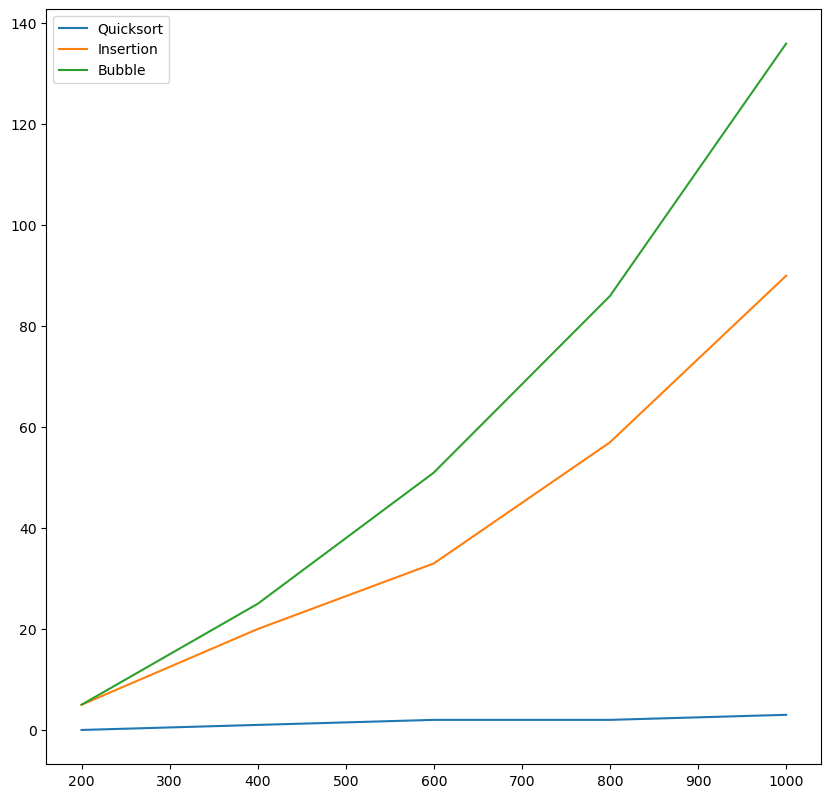

In [17]:
plt.figure(figsize=(10, 10), dpi=100)
plt.plot(df['Size'], df['Quicksort Runtime'], label = 'Quicksort');
plt.plot(df['Size'], df['Insertion Runtime'], label = 'Insertion')
plt.plot(df['Size'], df['Bubble Runtime'], label = 'Bubble');
plt.legend();

# Executive Summary

## For this experiment I created five different unsorted lists of strings each string consisting of 50 characters. The first list had 200 strings, the second 400, the third 600, the fourth 800, and the final one 1000. This experiment was meant to compare the performance of the quicksort sorting algorithm with a couple of its peers (in this case the insertion and bubble algorithm) in milliseconds.

## Regarding the results, quicksort crushed its fellow peers. In fact, as the size of the lists increased, the effects were barely registered on the quicksorting algorithm while the other two grew in exponential length (this was especially the case in the bubble sorting algorithm). At the highest size, quicksort sorted the strings in 3 milliseconds while insertion and bubble had a runtime of about 90 and 136 milliseconds respectively. This largely follows the Big O notation since both insertion and bubble typically run at O(n^2) while quicksort runs at O(n*log(n))

## What is interesting is that while insertion and bubble have the same Big O notation, Insertion runs at a faster rate. This is clearly due to the fact that insertion has a lower constant than bubble. While quicksort actually can have a Big O notation of O(n^2) in its worst case scenario, it only happens with very large amounts of data and a poor pivot choice. In this case, the pivot was the first string in the list each time, however since the sizes of the data were not that large, the Big O notation largely fell into its average for quicksort.

## This experiment is relevant to data engineers since its important to understand what sorting algorithm works best in terms of runtime. Quicksort is leaps and bounds better than the other two in that respect, especially when considering that I used its supposed worst performing pivot. Utilizing this said algorithm, therefore, is tantamount to picking the best way to optimize an application with said functionality.